In [1]:
import pyscf

In [2]:
molecule = """
Cr -1.32078 0.00005 -0.00007
Cr 1.32077 0.00005 -0.00007
O 0.00000 -0.16583 1.45468
O 0.00000 1.34277 -0.58372
O 0.00000 -1.17683 -0.87101
H 0.00002 0.50128 2.15993
H 0.00056 1.61869 -1.51448
H -0.00044 -2.12079 -0.64413
N -2.64980 -1.44569 0.71142
H -2.18696 -2.18198 1.24440
H -3.05396 -1.84420 -0.13607
H -3.36727 -1.00512 1.28721
N -2.64980 1.33902 0.89630
N -2.64980 0.10677 -1.60777
H -3.36727 -0.61216 -1.51411
H -3.05396 0.80432 1.66516
N 2.64980 -1.44568 0.71142
N 2.64979 1.33903 0.89630
N 2.64980 0.10678 -1.60777
H -2.18697 2.16873 1.26745
H -3.36727 1.61737 0.22686
H -2.18696 0.01334 -2.51190
H -3.05397 1.03998 -1.52914
H 2.18696 -2.18197 1.24440
H 3.05396 -1.84419 -0.13608
H 3.36727 -1.00510 1.28720
H 2.18695 2.16874 1.26745
H 3.05396 0.80433 1.66516
H 3.36726 1.61738 0.22685
H 2.18696 0.01335 -2.51190
H 3.05396 1.03999 -1.52914
H 3.36727 -0.61215 -1.51411
"""

In [4]:
basis = "def2-svp"
pymol = pyscf.gto.Mole(
        atom    =   molecule,
        symmetry=   True,
        spin    =   6,
        charge  =   3,
        basis   =   basis)


pymol.build()
print("symmetry: ",pymol.topgroup)
# mf = pyscf.scf.UHF(pymol).x2c()
mf = pyscf.scf.ROHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.chkfile = "scf.fchk"
mf.init_guess = "sad"
mf.run(max_cycle=200)

print(" Hartree-Fock Energy: %12.8f" % mf.e_tot)
mf.analyze()

symmetry:  C1


******** <class 'pyscf.scf.rohf.ROHF'> ********
method = ROHF-RHF
initial guess = sad
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = scf.fchk
max_memory 4000 MB (current use 0 MB)
num. doubly occ = 63  num. singly occ = 6
init E= -2649.46926360849
  HOMO = -0.192719824232847  LUMO = -0.0859499418977293
cycle= 1 E= -2648.33372169409  delta_E= 1.14  |g|= 1.13  |ddm|= 3.97
  HOMO = -0.475198979599909  LUMO = -0.293329515684973
cycle= 2 E= -2648.74406399993  delta_E= -0.41  |g|= 0.627  |ddm|= 1.22
  HOMO = -0.586114631333289  LUMO = -0.293446133720418
cycle= 3 E= -2648.82815509457  delta_E= -0.0841  |g|= 0.167  |ddm|= 0.545
  HOMO = -0.590572205613899  LUMO = -0.292500265426236
cycle= 4 E= -2648.83694212618  delta_E= -0.00879  |g|= 0.0381  |ddm|= 0.224
  HOMO = -0.591633

((array([1.99999824e+00, 1.99999458e+00, 1.99960088e+00, 4.14818565e-01,
         3.75285572e-03, 1.99998869e+00, 1.99999390e+00, 1.99999390e+00,
         1.99864797e+00, 1.99892193e+00, 1.99892191e+00, 1.28675457e-02,
         1.59266417e-02, 1.59291528e-02, 5.77960125e-01, 8.23786075e-01,
         8.72312122e-01, 5.77942887e-01, 9.69447199e-01, 6.88437541e-03,
         1.27261431e-02, 1.29838516e-02, 6.88399354e-03, 1.35033745e-02,
         2.17451001e-04, 4.79353158e-04, 5.90047485e-05, 1.74026474e-04,
         3.93739724e-04, 1.95872665e-04, 3.36651840e-04, 1.99999824e+00,
         1.99999458e+00, 1.99960088e+00, 4.14817519e-01, 3.75285192e-03,
         1.99998869e+00, 1.99999390e+00, 1.99999390e+00, 1.99864798e+00,
         1.99892192e+00, 1.99892194e+00, 1.28676056e-02, 1.59282213e-02,
         1.59278152e-02, 5.77945225e-01, 8.23806014e-01, 8.72295856e-01,
         5.77959987e-01, 9.69448112e-01, 6.88424180e-03, 1.27261860e-02,
         1.29830250e-02, 6.88415890e-03, 1.35037877

In [ ]:
F = mf.get_fock()

In [178]:
import numpy as np
import scipy
import copy as cp

def get_frag_bath(Pin, frag, S, thresh=1e-7, verbose=1):
    print(" Frag: ", frag)
    X = scipy.linalg.sqrtm(S)
    Xinv = scipy.linalg.inv(X)

    Cfrag = Xinv@X[:,frag]

    P = X@Pin@X.T

    nfrag = np.trace(P[frag,:][:,frag])
    P[frag,:] = 0
    P[:,frag] = 0
    bath_idx = []
    env_idx = []
    vir_idx = []
    e,U = np.linalg.eigh(P)
    nbath = 0.0
    for nidx,ni in enumerate(e):
        if thresh < ni < 1-thresh:
            print(" eigvalue: %12.8f" % ni)
            bath_idx.append(nidx)
            nbath += ni
        elif ni <= thresh:
            env_idx.append(nidx)
        elif ni >= 1-thresh:
            vir_idx.append(nidx)
        else:
            error(" ?")

            
    print(" # Electrons frag: %12.8f bath: %12.8f total: %12.8f" %(nfrag, nbath, nfrag+nbath))
    Cenv = Xinv@U[:,env_idx]
    Cvir = Xinv@U[:,vir_idx]
    Cbath = Xinv@U[:,bath_idx]
    print(Cenv.shape[1] + Cvir.shape[1] + Cbath.shape[1])
    C = np.hstack((Cfrag, Cbath))
    # print(C.T@S@C)
    return (Cenv, C, Cvir)

def gram_schmidt(frags, S):
    # |v'> = (1-sum_i |i><i|) |v>
    #      = |v> - sum_i |i><i|v>
    
    seen = []
    out = []
    for f in frags:
        outf = []
        for fi in range(f.shape[1]):
            v = f[:,fi]
            for j in seen:
                v = v - j * (j.T@v)
            v = v/np.linalg.norm(v)
            outf.append(v)
        out.append(f)
    return np.hstack(out)

In [177]:

# Find AO's corresponding to atoms 
# print(mf.mol.aoslice_by_atom())
# print(mf.mol.ao_labels(fmt=False, base=0))
full = []
frag1 = []
frag2 = []
frag3 = []
frag4 = []
for ao_idx,ao in enumerate(mf.mol.ao_labels(fmt=False)):
    if ao[0] == 0:
        if ao[2] in ("3s", "3p"):
            frag1.append(ao_idx)
            full.append(ao_idx)
        elif ao[2] in ("3d",):
            frag2.append(ao_idx)
            full.append(ao_idx)
    elif ao[0] == 1:
        if ao[2] in ("3s", "3p"):
            frag3.append(ao_idx)
            full.append(ao_idx)
        if ao[2] in ("3d",):
            frag4.append(ao_idx)
            full.append(ao_idx)


P = mf.make_rdm1()
Pa = P[0,:,:]
Pb = P[1,:,:]



(Cenv, Cact, Cvir) = get_frag_bath(Pa, full, S)
pyscf.tools.molden.from_mo(mf.mol, "C_act.molden", Cact)
Paact = Cact.T @ S @ Pa @ S @ Cact
Pbact = Cact.T @ S @ Pb @ S @ Cact

CC = np.hstack((Cenv, Cact, Cvir))
print(P.shape)
print(CC.shape)
print(" Should be number of orbitals: %12.8f" %np.trace(CC.T @ S @ CC))

# Why is Na these not integer? 
print(" # a electrons: %12.8f" %(np.trace(Paact)))
print(" # b electrons: %12.8f" %(np.trace(Pbact)))

C = mf.mo_coeff
S = mf.get_ovlp()


(Ce1, Cf1, Cv1) = get_frag_bath(Pa, frag1, S)
(Ce2, Cf2, Cv2) = get_frag_bath(Pa, frag2, S)
(Ce3, Cf3, Cv3) = get_frag_bath(Pa, frag3, S)
(Ce4, Cf4, Cv4) = get_frag_bath(Pa, frag4, S)

Cgs = gram_schmidt((Cf1, Cf2, Cf3, Cf4), S)

Pags = Cgs.T @ S @ Pa @ S @ Cgs
Pbgs = Cgs.T @ S @ Pb @ S @ Cgs

print(" # a electrons: %12.8f" %(np.trace(Pags)))
print(" # b electrons: %12.8f" %(np.trace(Pbgs)))
pyscf.tools.molden.from_mo(mf.mol, "C_frags.molden", Cgs)


 Frag:  [2, 8, 9, 10, 14, 15, 16, 17, 18, 33, 39, 40, 41, 45, 46, 47, 48, 49]
 eigvalue:   0.01167088
 eigvalue:   0.01821283
 eigvalue:   0.01821296
 eigvalue:   0.02159853
 eigvalue:   0.02159978
 eigvalue:   0.02331712
 eigvalue:   0.03283547
 eigvalue:   0.04773879
 eigvalue:   0.08588208
 eigvalue:   0.10967280
 eigvalue:   0.10967487
 eigvalue:   0.11277113
 eigvalue:   0.11277573
 eigvalue:   0.14002260
 eigvalue:   0.91512103
 eigvalue:   0.91512449
 eigvalue:   0.92413243
 eigvalue:   0.92414957
 # Electrons frag:  13.45548689 bath:   4.54451311 total:  18.00000000
(2, 293, 293)
(293, 311)
 Should be number of orbitals: 311.00000000
 # a electrons:  18.97932035
 # b electrons:  12.54805183
 Frag:  [2, 8, 9, 10]
 eigvalue:   0.01996196
 eigvalue:   0.01996311
 eigvalue:   0.02006730
 eigvalue:   0.03917919
 # Electrons frag:   3.90082843 bath:   0.09917157 total:   4.00000000
 Frag:  [14, 15, 16, 17, 18]
 eigvalue:   0.11135154
 eigvalue:   0.11135426
 eigvalue:   0.11148665
 e

In [5]:
import numpy as np
dm1 = mf.make_rdm1();
np.save("uhf_mo_coeffs_a", mf.mo_coeff[0])
np.save("uhf_mo_coeffs_b", mf.mo_coeff[1])
np.save("uhf_density", dm1)

(69, 63)
 Number of active orbitals:  46
 Number of doc    orbitals:  43


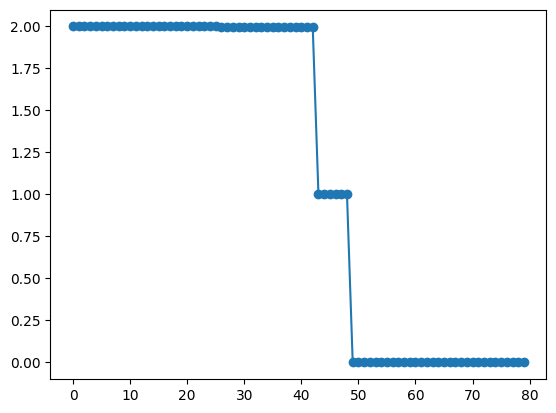

In [91]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from matplotlib import pyplot as plt


Ca = mf.mo_coeff[0]
Cb = mf.mo_coeff[1]
S = mf.get_ovlp()
na1 = mf.nelec[0]
nb1 = mf.nelec[1]
print(mf.nelec)

Ca_doc = Ca[:,0:na1]
Cb_doc = Cb[:,0:nb1]
Pa = Ca_doc @ Ca_doc.T
Pb = Cb_doc @ Cb_doc.T

P = Pa + Pb

sqrtS = sp.linalg.sqrtm(S)
P = sqrtS @ P @ sqrtS
P = (P + P.T) * .5
# F = sp.linalg.eig(P);
P_evals, P_evecs = sp.linalg.eigh(P)
perm = np.argsort(P_evals)[::-1]
P_evals = P_evals[perm]
P_evecs = P_evecs[:,perm]

# print("S^2", mf.spin_square((Ca_doc,Cb_doc),S))
act_list = []
doc_list = []

thresh = .0001
for idx,n in enumerate(P_evals):
#     @printf(" %4i = %12.8f\n",idx,n)
    if n < 2.0 - thresh:
        if n > thresh:
            act_list.append(idx)
    else:
        doc_list.append(idx)
        
        
print(" Number of active orbitals: ", len(act_list))
print(" Number of doc    orbitals: ", len(doc_list))

invsqrtS = sp.linalg.inv(sqrtS)

Cact = invsqrtS @ P_evecs[:,act_list]
Cdoc = invsqrtS @ P_evecs[:,doc_list]


pyscf.tools.molden.from_mo(pymol, "C_act.molden", Cact)
pyscf.tools.molden.from_mo(pymol, "C_doc.molden", Cdoc)

# import matplotlib as mpl

# plt.plot(sorted(P_evals)[420:470], marker="o")
plt.plot(P_evals[20:100], marker="o")

In [92]:
Cact_loc = pyscf.lo.PM(pymol).kernel(Cact, verbose=4);
pyscf.tools.molden.from_mo(pymol, "C_act_loc.molden", Cact_loc)


Set conv_tol_grad to 0.000316228
macro= 1  f(x)= 18.443140127321  delta_f= 18.4431  |g|= 1.9419  4 KF 20 Hx
macro= 2  f(x)= 22.87306356356  delta_f= 4.42992  |g|= 2.30749  4 KF 20 Hx
macro= 3  f(x)= 28.805621262499  delta_f= 5.93256  |g|= 2.37051  4 KF 20 Hx
macro= 4  f(x)= 33.29100496144  delta_f= 4.48538  |g|= 2.22678  4 KF 20 Hx
macro= 5  f(x)= 35.157292757693  delta_f= 1.86629  |g|= 2.08657  3 KF 20 Hx
macro= 6  f(x)= 37.227969640907  delta_f= 2.07068  |g|= 1.02627  4 KF 20 Hx
macro= 7  f(x)= 37.848892638234  delta_f= 0.620923  |g|= 0.342235  4 KF 22 Hx
macro= 8  f(x)= 37.941515348427  delta_f= 0.0926227  |g|= 0.0898384  4 KF 24 Hx
macro= 9  f(x)= 37.955226005701  delta_f= 0.0137107  |g|= 0.00682435  5 KF 29 Hx
macro= 10  f(x)= 37.955371838593  delta_f= 0.000145833  |g|= 0.00222135  5 KF 32 Hx
macro= 11  f(x)= 37.955409215637  delta_f= 3.7377e-05  |g|= 0.000420851  6 KF 35 Hx
macro= 12  f(x)= 37.955414500001  delta_f= 5.28436e-06  |g|= 0.000390603  1 KF 5 Hx
macro= 13  f(x)= 37.955

In [53]:
# # clustering from average positions
# print(np.trace(Cact_loc.T @ S @ Cact_loc))
# r1 = pymol.intor_symmetric("int1e_r");
# r2 = pymol.intor_symmetric("int1e_r2");

# rx = (Cact_loc.T @ r1[0,:,:] @ Cact_loc).diagonal();
# ry = (Cact_loc.T @ r1[1,:,:] @ Cact_loc).diagonal();
# rz = (Cact_loc.T @ r1[2,:,:] @ Cact_loc).diagonal();
# n_act = Cact_loc.shape[1]
# positions = np.zeros((n_act,3))
# positions[:,0] = rx
# positions[:,1] = ry
# positions[:,2] = rz
# xyz_str = "{n_act}\n\n".format(n_act = n_act)
# for i in range(n_act):
#     xyz_str += "H {x} {y} {z}\n".format(x=positions[i,0], y=positions[i,1], z=positions[i,2])
    
# # print(xyz_str)

# metric = np.zeros((n_act, n_act))

# for i in range(n_act):
#     for j in range(i+1,n_act):
#         pi = positions[i,:]
#         pj = positions[j,:]
#         # vari = r2[i,i] - r1[i,i]*r1[i,i]
#         # varj = r2[j,j] - position]*r1[i,i]
#         dist = np.sqrt((pi[0]-pj[0])**2 + (pi[1]-pj[1])**2 + (pi[2]-pj[2])**2 )
#         metric[i,j] = np.exp(-.5* dist**2)
#         # metric[i,j] = np.exp(-(r2[i,i] + r2[j,j]) * dist)
#         metric[j,i] = metric[i,j]
#         # if metric[i,j] > .01:
#         #     print(" %2i %2i %12.8f" %(i, j, metric[i,j]))
        
# plt.matshow(metric);


# Now build JK

In [54]:
h0 = pyscf.gto.mole.energy_nuc(pymol)
h  = pyscf.scf.hf.get_hcore(pymol)
j, k = pyscf.scf.hf.get_jk(pymol, Pa+Pb, hermi=1)

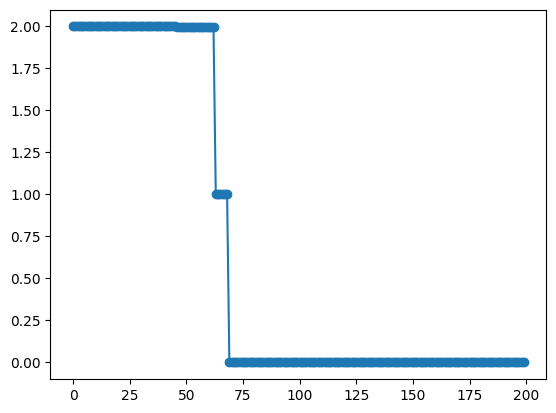

In [61]:
import matplotlib as mpl
from matplotlib import pyplot as plt

plt.plot(sorted(P_evals)[::-1][0:200], marker='o')
operator = k

C = cp.deepcopy(Cact_loc)
k1 = C.T @ operator @ C

# Graph Clustering

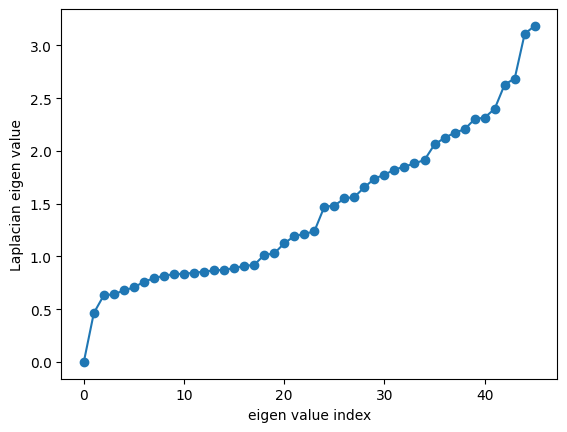

In [64]:
import copy as cp

nvecs = 2

A = abs(k1)
L = -1*A
for i in range(A.shape[0]):
    L[i,i] += np.sum(A[i,:])
    
L_evals, L_evecs = sp.linalg.eigh(L)
# print(L_evals)
plt.plot(L_evals,marker='o');
plt.xlabel("eigen value index");
plt.ylabel("Laplacian eigen value");

# L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
# F = eigen(L);


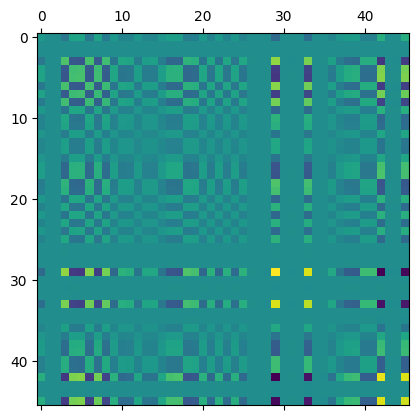

In [65]:
# projection onto the lowest `nvecs` fiedler vectors

L_evecs_ss = L_evecs[:,0:nvecs]
graph = L_evecs_ss @ L_evecs_ss.T
plt.matshow(graph);

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=nvecs, random_state=0).fit(graph)
# kmeans.labels_array([1, 1, 1, 0, 0, 0], dtype=int32)

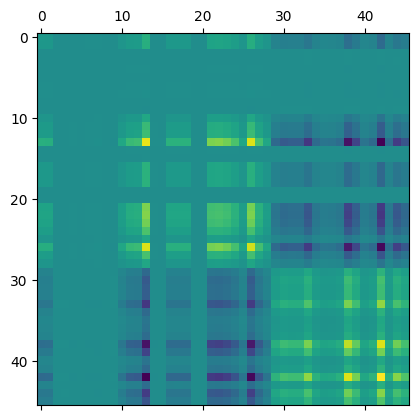

In [67]:
kmeans.labels_
sorted_list = np.argsort(kmeans.labels_)
plt.matshow(graph[sorted_list, :][:, sorted_list]);

In [68]:
C_sorted = Cact_loc[:,sorted_list]
pyscf.tools.molden.from_mo(pymol, "C_act_loc_sorted.molden", C_sorted)

In [ ]:
# Now let's break up that first large cluster on the metal

m = C_sorted[:,24:34].T @ operator @ C_sorted[:,24:34]
m_evals, m_evecs = sp.linalg.eigh(m)

m_evecs = m_evecs[:, [0,9,1,2,3,4,5,6,7,8]] # put 4s sig,sig* first
C_sorted_2 = cp.deepcopy(C_sorted)
C_sorted_2[:,24:34] = C_sorted[:,24:34] @ m_evecs
pyscf.tools.molden.from_mo(pymol, "C_act_loc_sorted_2.molden", C_sorted_2)

# sorted_list_2 = [*range(34)]
# sorted_list_2[4] = -1
# sorted_list_2[5] = -2


# sorted_list_2 = np.argsort(sorted_list_2)

# C_sorted_3 = C_sorted_2[:, sorted_list_2]
# pyscf.tools.molden.from_mo(pymol, "C_act_loc_sorted_3.molden", C_sorted_3)

clusters = [
            [*range(0,6)],
            [*range(6,12)],
            [*range(12,18)],
            [*range(18,24)],
            [*range(24,32)],
            [*range(32,34)]
           ]
init_fspace = [
    (3,3),
    (3,3),
    (3,3),
    (3,3),
    (1,1),
    (4,4)
];



WARN: orbitals [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] not symmetrized, norm = [0.50000006 0.50000003 0.5        0.5000001  0.50000005 0.5
 0.50000003 0.50000002 0.50000007 0.50000001 0.5        0.50000007
 0.50000007 0.50000003 0.50000007 0.50000002 0.50000001 0.5
 0.50000005 0.50000003 0.5000001  0.5        0.5        0.50000006]



In [121]:
print(clusters)
print(init_fspace)

[[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11], [12, 13, 14, 15, 16, 17], [18, 19, 20, 21, 22, 23], [24, 25, 26, 27, 28, 29, 30, 31], [32, 33]]
[(3, 3), (3, 3), (3, 3), (3, 3), (1, 1), (4, 4)]


# Make Integrals

In [122]:
d1_embed = 2 * Cdoc @ Cdoc.T

h0 = pyscf.gto.mole.energy_nuc(pymol)
h  = pyscf.scf.hf.get_hcore(pymol)
j, k = pyscf.scf.hf.get_jk(pymol, d1_embed, hermi=1)

In [123]:
h0 += np.trace(d1_embed @ ( h + .5*j - .25*k))

h = C_sorted_2.T @ h @ C_sorted_2
j = C_sorted_2.T @ j @ C_sorted_2;
k = C_sorted_2.T @ k @ C_sorted_2;

In [124]:
nact = h.shape[0]

h2 = pyscf.ao2mo.kernel(pymol, C_sorted_2, aosym="s4", compact=False)
h2.shape = (nact, nact, nact, nact)

In [125]:
# The use of d1_embed only really makes sense if it has zero electrons in the
# active space. Let's warn the user if that's not true

S = pymol.intor("int1e_ovlp_sph")
n_act = np.trace(S @ d1_embed @ S @ C_sorted_2 @ C_sorted_2.T)
if abs(n_act) > 1e-8 == False:
    print(n_act)
    error(" I found embedded electrons in the active space?!")

h1 = h + j - .5*k;


In [126]:
np.save("clustered1_integrals_h0", h0)
np.save("clustered1_integrals_h1", h1)
np.save("clustered1_integrals_h2", h2)
np.save("clustered1_mo_coeffs", C_sorted_2)
np.save("clustered1_overlap_mat", S)